<a href="https://colab.research.google.com/github/Ehsan-Roohi/DSMC_Python/blob/main/Supervised_Shock_wave_DSMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data...
Normalizing data...
Normalization successful.

Building the deeper model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)


Starting training for 200 epochs...
Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2411 - val_loss: 0.0455
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 - val_loss: 0.0409
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - val_loss: 0.0330
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - val_loss: 0.0318
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - val_loss: 0.0185
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - val_loss: 0.0194
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045 - val_loss: 0.0105
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - val_loss: 0.0144
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - val_loss: 0.0076
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0082
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 12/200
45/45 ━━━━━━━

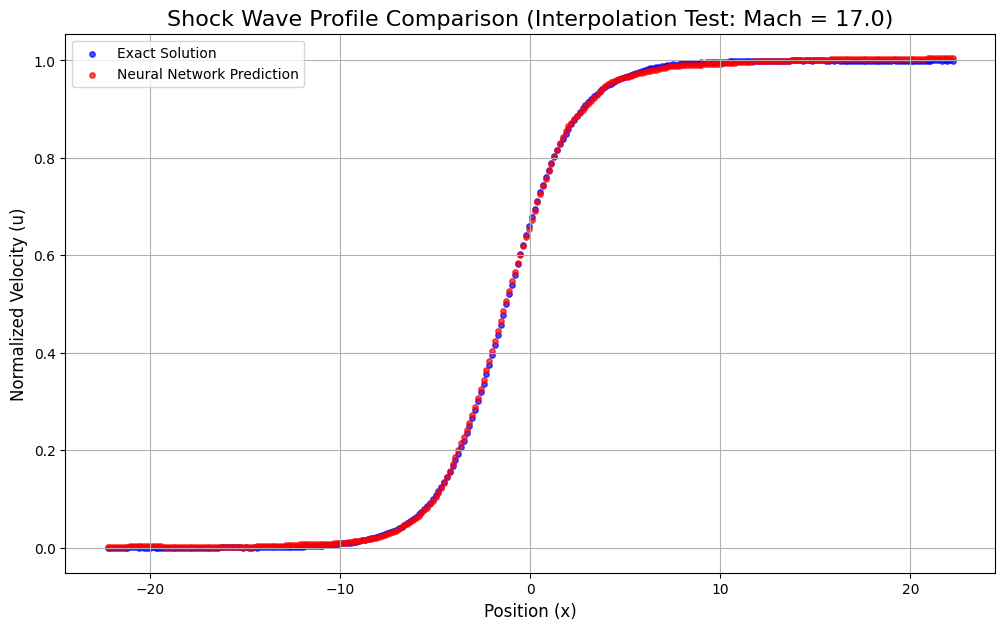

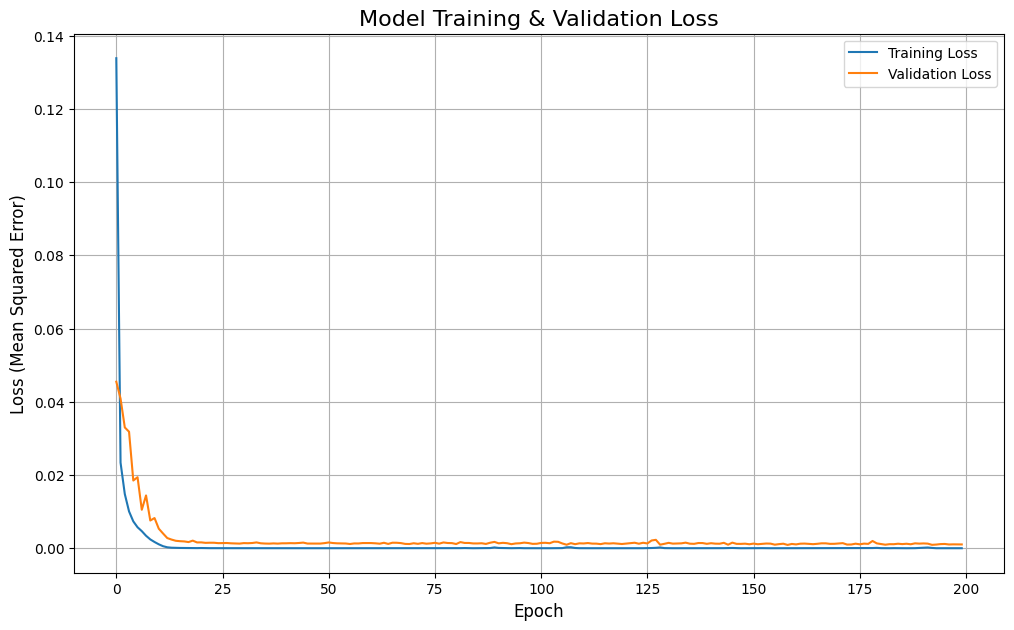

In [3]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

# -- 1. Data Loading and Normalization --

# --- MODIFIED: The path is now set for the main Colab session folder ---
DATASET_PATH = './'

# The train/test split for the interpolation test
train_files = ['M14.txt', 'M15.txt', 'M16.txt', 'M18.txt', 'M19.txt', 'M20.txt']
test_file = 'M17.txt'
# ---------------------------------------------------------

# A check to make sure at least one data file exists in the path
if not os.path.exists(os.path.join(DATASET_PATH, train_files[0])):
    raise FileNotFoundError(f"Data files not found in '{DATASET_PATH}'. Please make sure you have uploaded the .txt files to the Colab session.")


def load_data(files, path):
    x_data, y_data, mach_data = [], [], []
    for file_name in files:
        mach_number = float(file_name.replace('M', '').replace('.txt', ''))
        full_path = os.path.join(path, file_name)
        data = np.loadtxt(full_path)
        x_data.extend(data[:, 0])
        y_data.extend(data[:, 2])
        mach_data.extend([mach_number] * len(data))
    return np.array(x_data), np.array(y_data), np.array(mach_data)

print("Loading data...")
x_train, y_train, mach_train = load_data(train_files, DATASET_PATH)
x_test, y_test, mach_test = load_data([test_file], DATASET_PATH)

X_train_original = np.stack([x_train, mach_train], axis=1)
X_test_original = np.stack([x_test, mach_test], axis=1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Normalizing data...")
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = x_scaler.fit_transform(X_train_original)
y_train_scaled = y_scaler.fit_transform(y_train)

X_test_scaled = x_scaler.transform(X_test_original)
y_test_scaled = y_scaler.transform(y_test)
print("Normalization successful.")


# -- 2. Neural Network Design and Training --
print("\nBuilding the deeper model...")
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

print("\nStarting training for 200 epochs...")
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=200,
    validation_split=0.2,
    verbose=1
)
print("Training finished.")


# -- 3. Evaluation and Plotting --
print("\nEvaluating and predicting...")
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Mean Squared Error on Test Data (normalized): {loss:.6f}")

y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

print("Plotting results...")
test_mach_number = mach_test[0]

# --- Comparison Plot ---
plt.figure(figsize=(12, 7))
plt.scatter(x_test, y_test, label='Exact Solution', color='blue', s=15, alpha=0.7)
plt.scatter(x_test, y_pred, label='Neural Network Prediction', color='red', s=15, alpha=0.7)
plt.title(f'Shock Wave Profile Comparison (Interpolation Test: Mach = {test_mach_number})', fontsize=16)
plt.xlabel('Position (x)', fontsize=12)
plt.ylabel('Normalized Velocity (u)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- Loss Curve Plot ---
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training & Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()